# Analysis and Querying:

These are the symbols that will be dropped:  []
These are the remaining symbols:  ['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'term', 'int_rate', 'instalment', 'grade', 'sub_grade', 'employment_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_date', 'loan_status', 'payment_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_date', 'last_payment_amount', 'next_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type']
id                                      int64
member_id                               int64
loan_amount                             int64
funded_amount  

c:\Users\james\Documents\GitHub\exploratory-data-analysis---customer-loans-in-finance489\db_utils.py:211: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[i] = pd.to_datetime(df[i])
c:\Users\james\Documents\GitHub\exploratory-data-analysis---customer-loans-in-finance489\db_utils.py:211: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[i] = pd.to_datetime(df[i])
c:\Users\james\Documents\GitHub\exploratory-data-analysis---customer-loans-in-finance489\db_utils.py:211: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[i] = pd.to_datetime(df[i])
c:\Users\james\Documents\GitHub\ex

                 id     member_id   loan_amount  funded_amount  \
count  5.423100e+04  5.423100e+04  54231.000000   51224.000000   
mean   7.621797e+06  8.655350e+06  13333.076100   13229.509117   
min    5.552100e+04  7.069400e+04    500.000000     500.000000   
25%    7.594330e+05  9.587720e+05   7000.000000    7000.000000   
50%    7.084590e+06  8.709873e+06  12000.000000   12000.000000   
75%    8.860616e+06  1.052714e+07  18000.000000   18000.000000   
max    3.867612e+07  4.146185e+07  35000.000000   35000.000000   
std    9.571362e+06  1.031281e+07   8082.196709    8019.017599   

       funded_amount_inv      int_rate    instalment    annual_inc  \
count       54231.000000  49062.000000  54231.000000  5.423100e+04   
mean        12952.622979     13.507328    400.013953  7.222085e+04   
min             0.000000      5.420000     15.670000  3.300000e+03   
25%          6700.000000     10.370000    224.205000  4.500000e+04   
50%         11300.000000     13.160000    347.150000  6

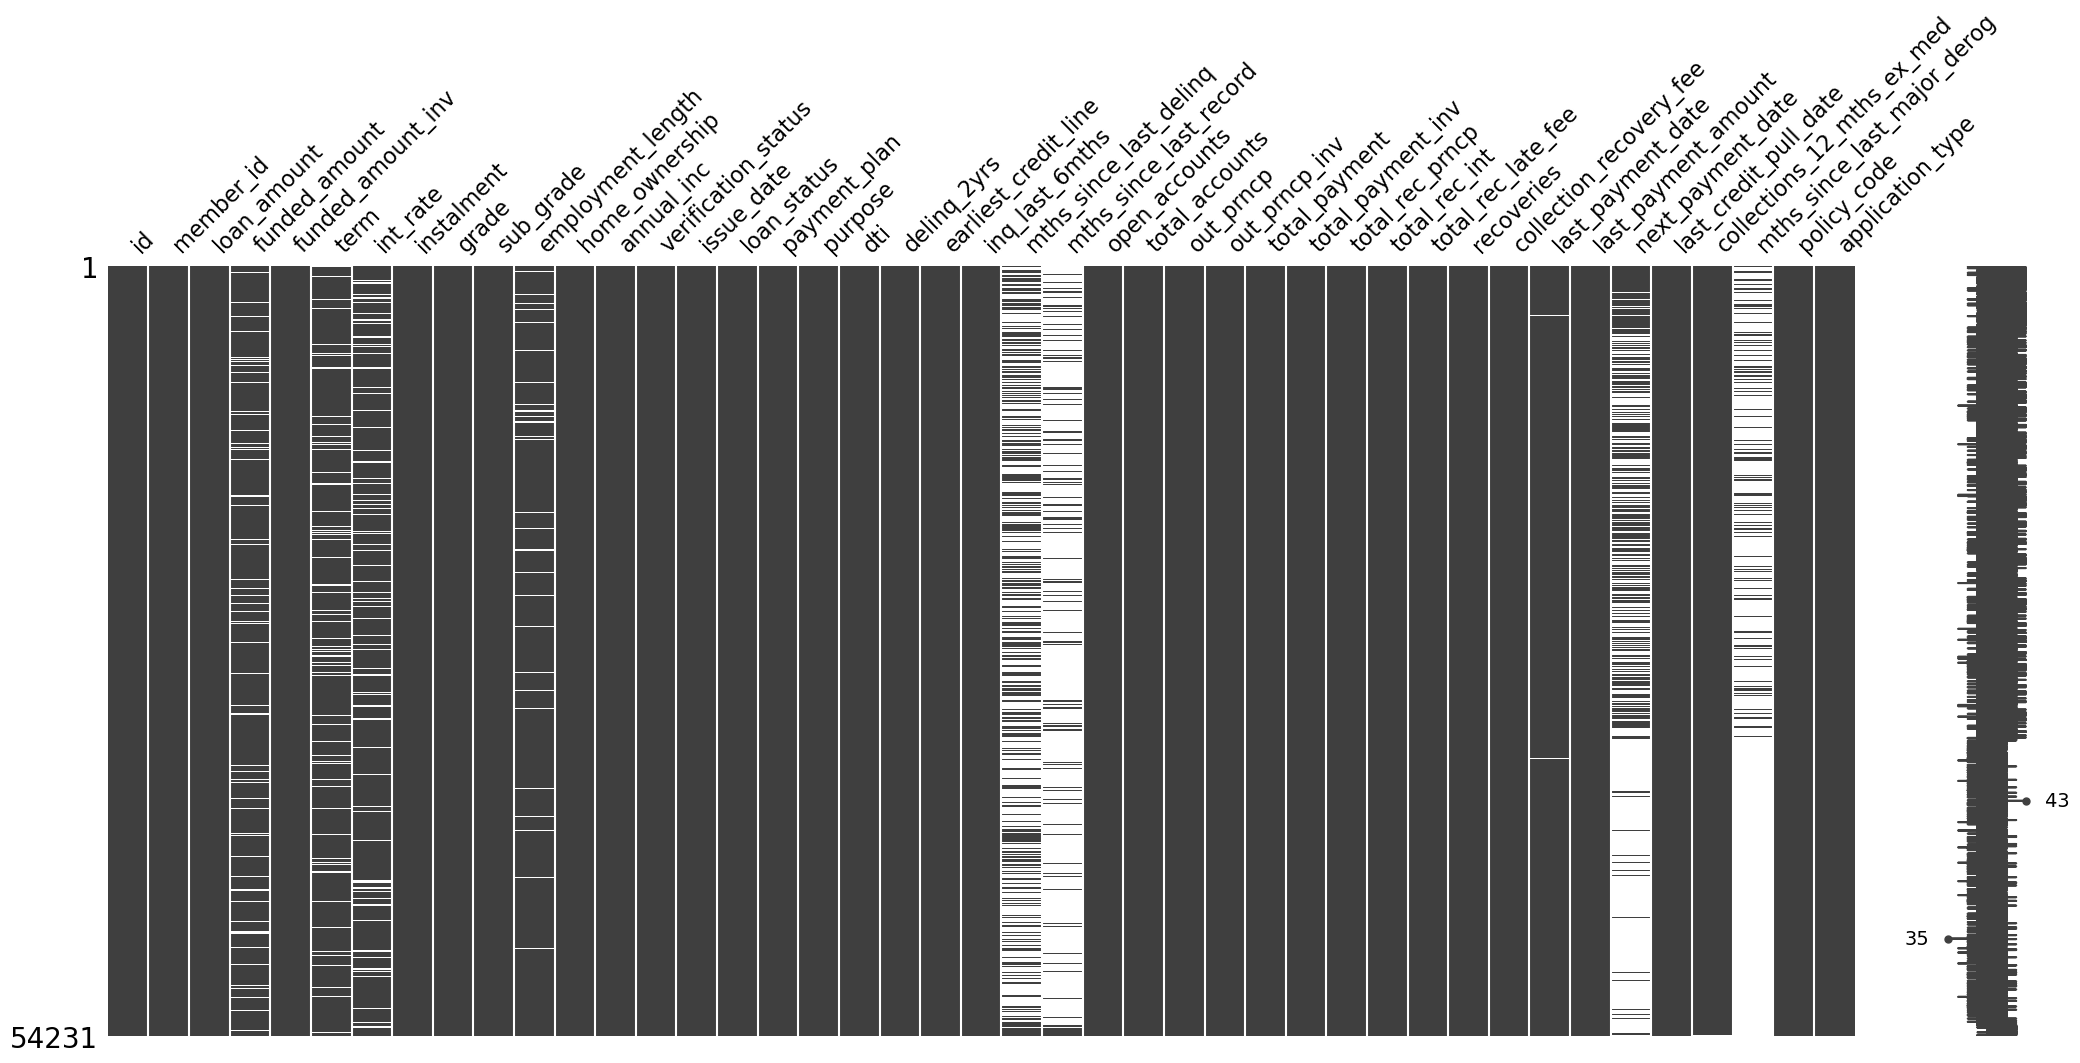

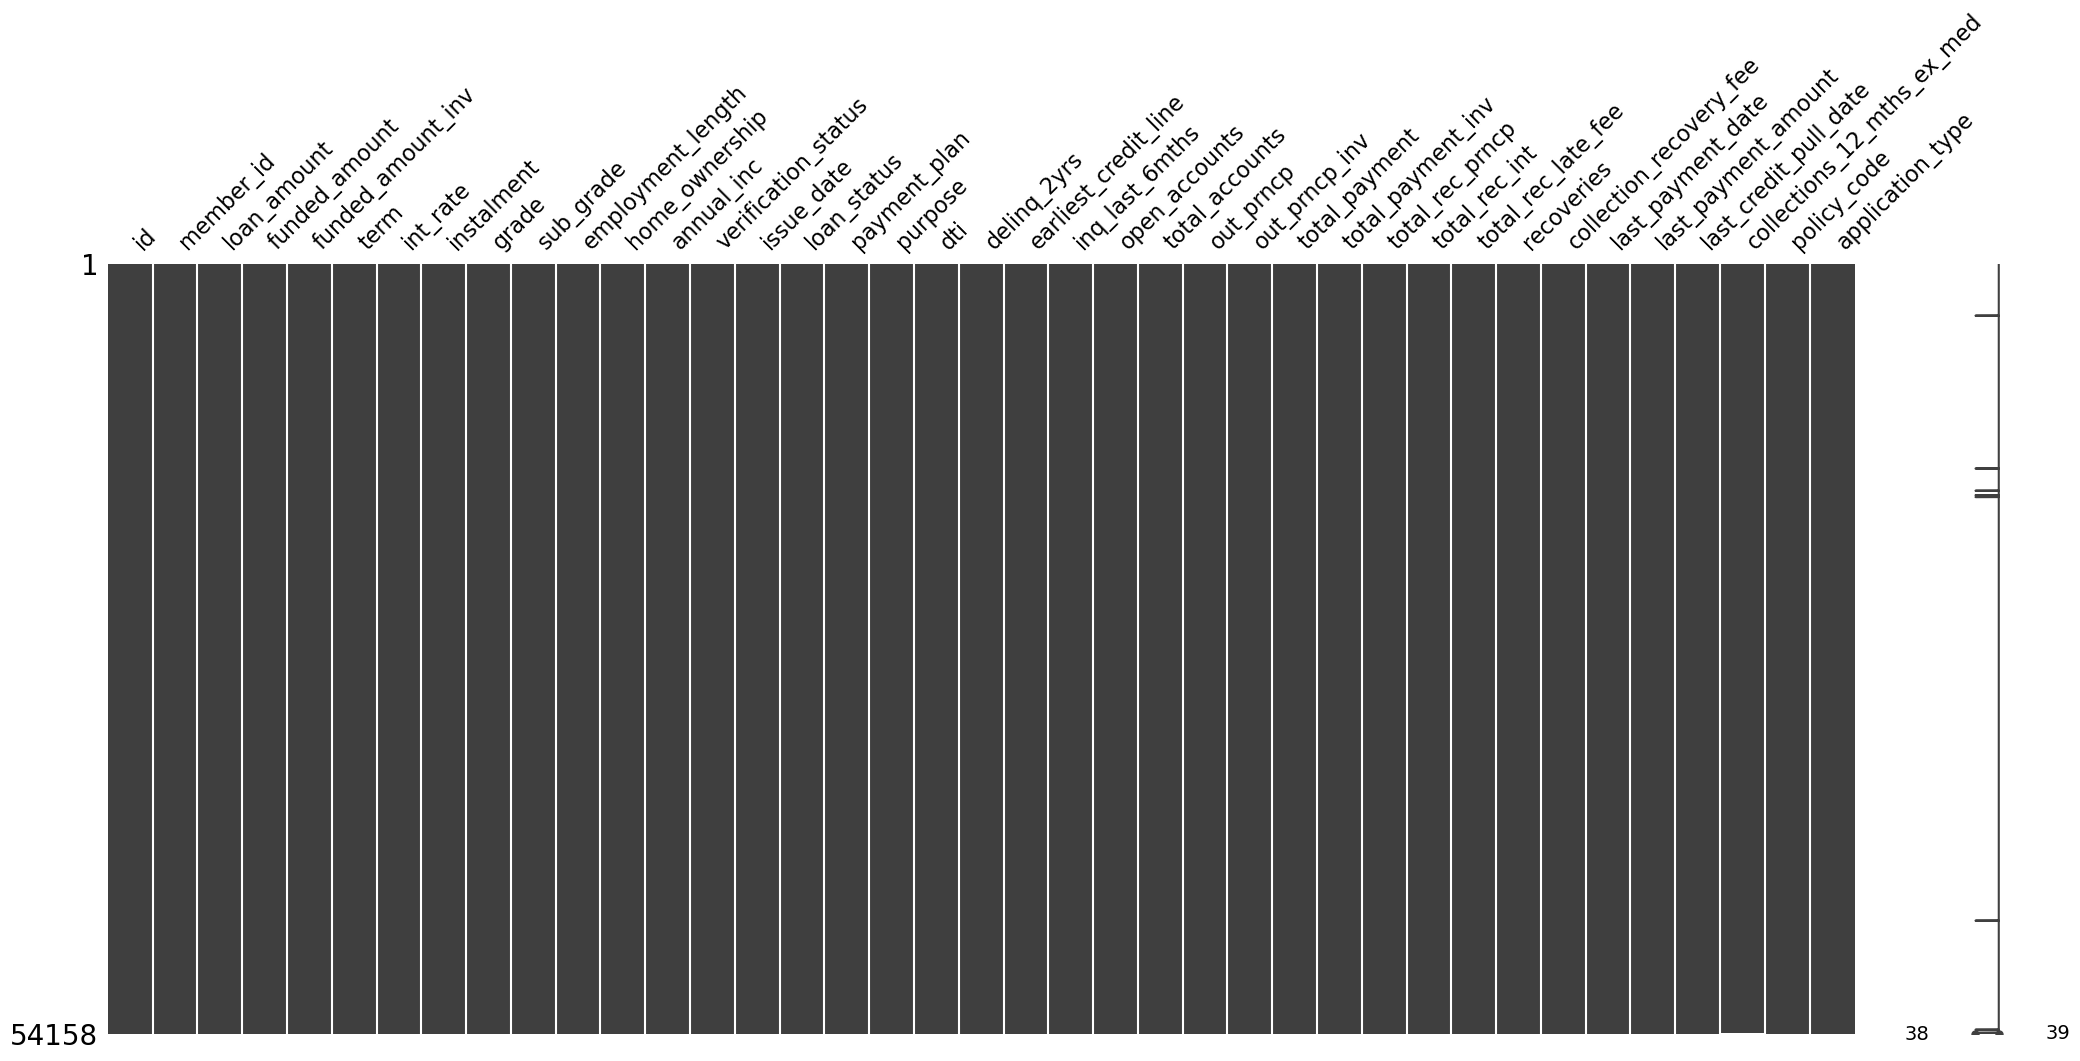

In [1]:
from db_utils import RDSDatabaseConnector
RDS = RDSDatabaseConnector()
from db_utils import DataTransform
DT = DataTransform()
from db_utils import DataFrameInfo
DFI = DataFrameInfo()
from db_utils import amount_of_nulls_and_column_drop
import missingno as msno
from db_utils import DataFrameTransform
DFT = DataFrameTransform()
from db_utils import Plotter
PL = Plotter()


#var2 = RDS.initialise_engine_and_extract_data()
#var3 = RDS.save_dataframe_to_csv()

df = RDS.load_dataframe_from_csv()

'''prints column names
#column_names = []
#for i in df:
#    column_names.append(i)
#print(column_names)'''

symbols = str(input('separate by spaces which columns are to be dropped: ')).split()
list_of_to_categorical = ['term','grade','sub_grade', 'employment_length','home_ownership','verification_status','loan_status','payment_plan','purpose','delinq_2yrs','application_type']
list_of_to_boolean = ['policy_code']
list_of_to_float = []
list_of_to_int = []
dates_to_convert = ['issue_date','earliest_credit_line','last_payment_date','next_payment_date','last_credit_pull_date']

df = DT.excess_symbol_removal(df, symbols)
df = DT.to_categorical(df, list_of_to_categorical)
df = DT.to_boolean(df, list_of_to_boolean)
df = DT.to_float(df, list_of_to_float)
df = DT.to_int(df, list_of_to_int)
df = DT.convert_dates_to_proper_format(df, dates_to_convert)

#DataFrameInfo class method execution.
df = DFI.describe_all_columns_to_check_their_datatypes(df)
df = DFI.extract_statistical_values_median_stddev_mean_from_cols_and_dataframe(df)
df = DFI.count_distinct_values_in_categorical_columns(df)
df = DFI.print_out_the_shape_of_the_dataframe(df)
df = DFI.generate_a_count_slash_percentage_count_of_NULL_values_in_each_column(df)

df = PL.generate_a_plot_for_nulls(df)
df = amount_of_nulls_and_column_drop(df)

df = DFT.impute(df)

df = PL.generate_a_plot_for_nulls(df)
df = amount_of_nulls_and_column_drop(df)

###############################################################################################


loan_amount
0.8049499212664805
funded_amount
0.8453459684028831
funded_amount_inv
0.8134147932289038
instalment
0.9966197132753346
open_accounts
1.0591996964176038
total_accounts
0.7790108313100861
out_prncp
2.354180013046064
out_prncp_inv
2.354601111038353
total_payment
1.2698546213317132
total_payment_inv
1.2578451112191
total_rec_prncp
1.2626685213524143
total_rec_int
2.2045290017035524
last_payment_amount
2.497273480374974


"\ndef transform_and_visualize(df, columns):\n    for col in columns:\n        print(col, ':', 'skew:', skew(df[col]))\n        plt.figure(figsize=(10, 5))\n        sns.histplot(df[col], kde=True)\n        plt.title(f'Distribution of {col} Before Transformation')\n        plt.show()\n        \n        transformed_data, _ = yeojohnson(df[col])\n        df[col] = transformed_data\n        \n        print(col, ':', 'skew:', skew(df[col]))\n        plt.figure(figsize=(10, 5))\n        sns.histplot(df[col], kde=True)\n        plt.title(f'Distribution of {col} After Transformation')\n        plt.show()\n\ntransform_and_visualize(df, list)\ntransform_and_visualize(df, list2)\ntransform_and_visualize(df, list3)\n"

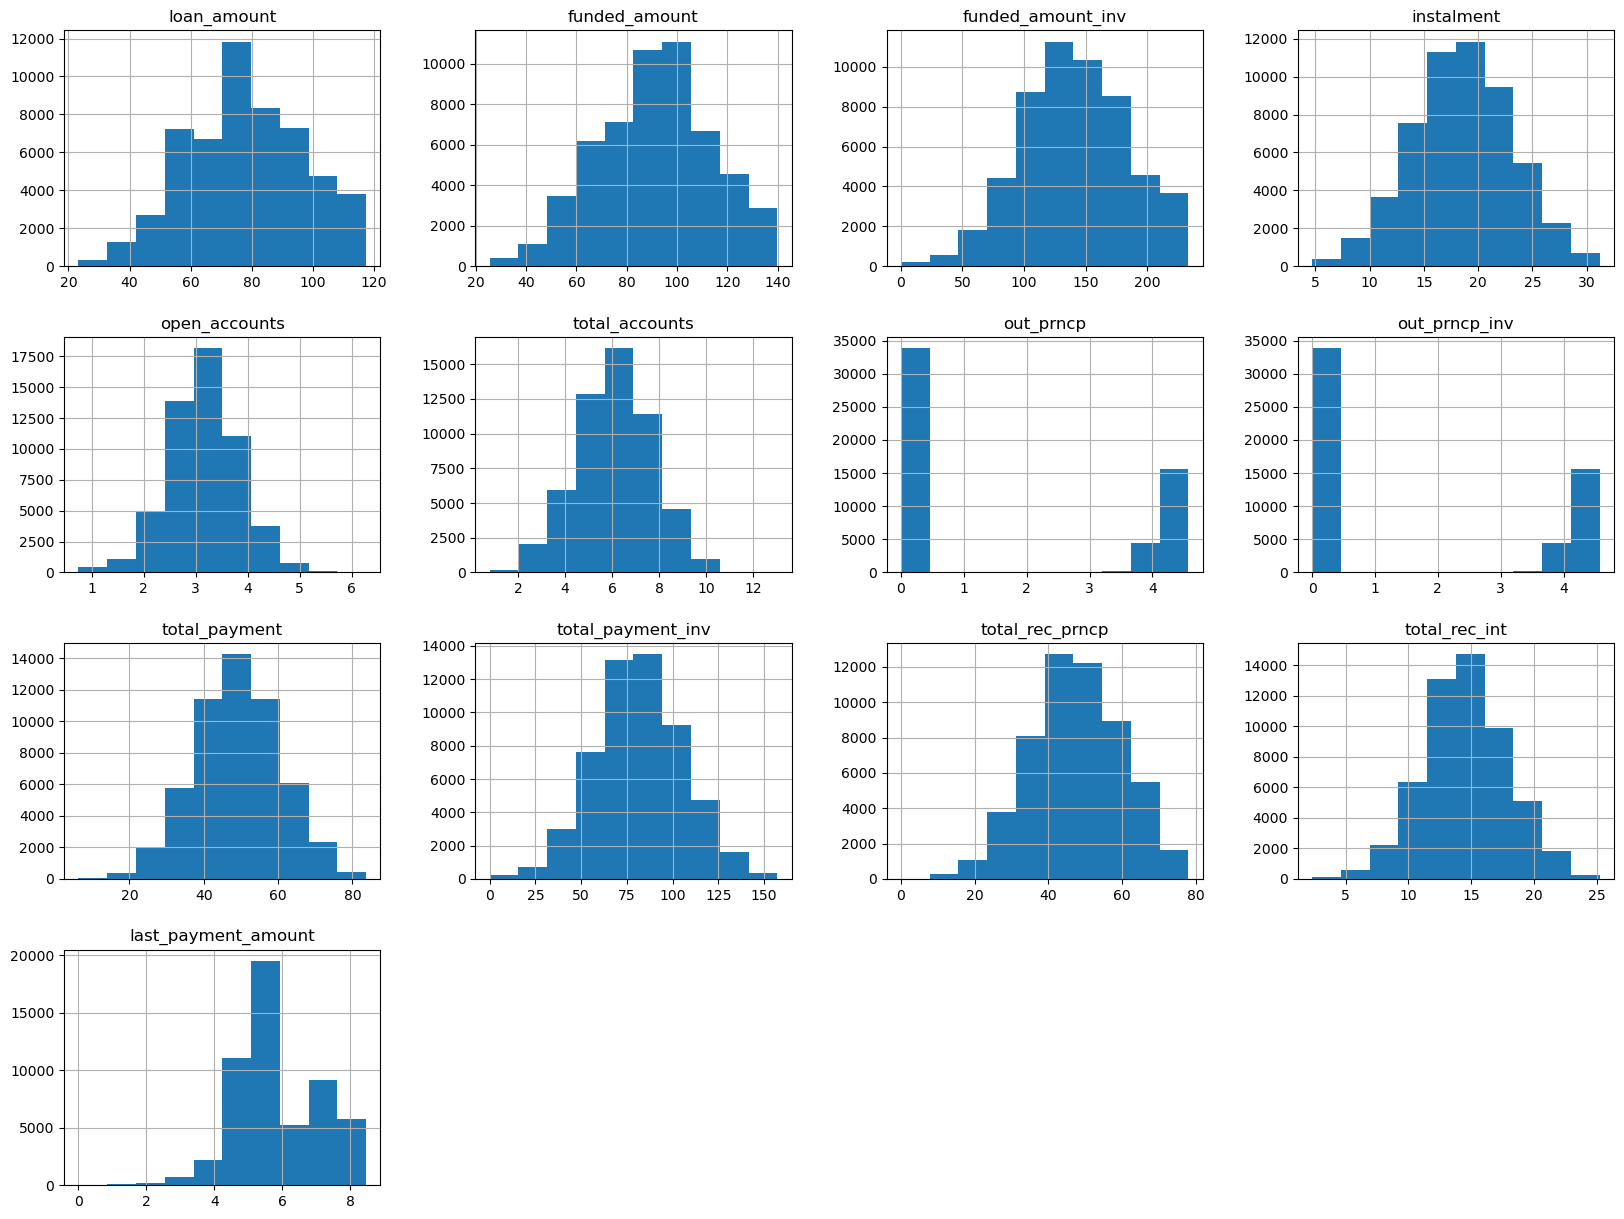

In [2]:

from scipy.stats import skew
from scipy.stats import boxcox
from scipy.stats import yeojohnson
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import missingno as msno

#sns.heatmap(df.corr(), annot=True)
#plt.show()



'''OLD TRANSFORMATIONS DON'T WORRY ABOUT IT
print('loan_amount',':','skew:',skew(df['loan_amount']))
plt.figure()
sns.displot(df['loan_amount'])

print('funded_amount',':','skew:',skew(df['funded_amount']))
plt.figure()
sns.displot(df['funded_amount'])

print('funded_amount_inv',':','skew:',skew(df['funded_amount_inv']))
plt.figure()
sns.displot(df['funded_amount_inv'])

print('int_rate',':','skew:',skew(df['int_rate']))
plt.figure()
sns.displot(df['int_rate'])

print('annual_inc',':','skew:',skew(df['annual_inc']))
plt.figure()
sns.displot(df['annual_inc'])

print('dti',':','skew:',skew(df['dti']))
plt.figure()
sns.displot(df['dti'])

print('delinq_2yrs',':','skew:',skew(df['delinq_2yrs']))
plt.figure()
sns.displot(df['delinq_2yrs'])

print('inq_last_6mths',':','skew:',skew(df['inq_last_6mths']))
plt.figure()
sns.displot(df['inq_last_6mths'])

print('open_accounts',':','skew:',skew(df['open_accounts']))
plt.figure()
sns.displot(df['open_accounts'])

print('total_accounts',':','skew:',skew(df['total_accounts']))
plt.figure()
sns.displot(df['total_accounts'])

print('out_prncp',':','skew:',skew(df['out_prncp']))
plt.figure()
sns.displot(df['out_prncp'])

print('out_prncp_inv',':','skew:',skew(df['out_prncp_inv']))
plt.figure()
sns.displot(df['out_prncp_inv'])

print('total_payment',':','skew:',skew(df['total_payment']))
plt.figure()
sns.displot(df['total_payment'])

print('total_payment_inv',':','skew:',skew(df['total_payment_inv']))
plt.figure()
sns.displot(df['total_payment_inv'])

print('total_rec_prncp',':','skew:',skew(df['total_rec_prncp']))
plt.figure()
sns.displot(df['total_rec_prncp'])

print('total_rec_int',':','skew:',skew(df['total_rec_int']))
plt.figure()
sns.displot(df['total_rec_int'])

print('total_rec_late_fee',':','skew:',skew(df['total_rec_late_fee']))
plt.figure()
sns.displot(df['total_rec_late_fee'])

print('recoveries',':','skew:',skew(df['recoveries']))
plt.figure()
sns.displot(df['recoveries'])

print('collection_recovery_fee',':','skew:',skew(df['collection_recovery_fee']))
plt.figure()
sns.displot(df['collection_recovery_fee'])

print('last_payment_amount',':','skew:',skew(df['last_payment_amount']))
plt.figure()
sns.displot(df['last_payment_amount'])

print('collections_12_mths_ex_med',':','skew:',skew(df['collections_12_mths_ex_med']))
plt.figure()
sns.displot(df['collections_12_mths_ex_med'])

print('policy_code',':','skew:',skew(df['policy_code']))
plt.figure()
sns.displot(df['policy_code'])

'''

'''LIST OF AVAILABLE TRANSFORMATIONS
#df['instalment'] = np.log(df['instalment'])
#df['instalment'] = boxcox(df['instalment'])[0]
#df['instalment'] = np.sqrt(df['instalment'])
#df['instalment'] = np.cbrt(df['instalment'])
#df['instalment'] = yeojohnson(df['instalment'])[0]
'''

list = ['loan_amount','funded_amount','funded_amount_inv','int_rate', 'instalment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_accounts','total_accounts','out_prncp','out_prncp_inv','total_payment','total_payment_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_payment_amount']
list2=['policy_code']
list3=['collections_12_mths_ex_med']
#for i in list:
#    ### PRE-TRANSFORMATION PRINTOUTS
#    print(i,':','skew:',skew(df[i]))
#    #plt.figure()
#    #sns.displot(df[i])
#    df[i] = yeojohnson(df[i])[0]
#    ###POST-TRANSFORMATION PRINTOUTS
#    print(i,':','skew:',skew(df[i]))
#    #plt.figure()
#    #sns.displot(df[i])

#for loops for list2 and 3
#for i in list2:
#    ### PRE-TRANSFORMATION PRINTOUTS
#    print(i,':','skew:',skew(df[i]))
#    #plt.figure()
#    #sns.displot(df[i])
#    df[i] = yeojohnson(df[i])[0]
#    ###POST-TRANSFORMATION PRINTOUTS
#    print(i,':','skew:',skew(df[i]))
#    #plt.figure()
#    #sns.displot(df[i])
    
#for i in list3:
#    ### PRE-TRANSFORMATION PRINTOUTS
#    print(i,':','skew:',skew(df[i]))
#    #plt.figure()
#    #sns.displot(df[i])
#    df[i] = yeojohnson(df[i])[0]
#    ###POST-TRANSFORMATION PRINTOUTS
#    print(i,':','skew:',skew(df[i]))
#    #plt.figure()
#    #sns.displot(df[i])

list_for_skew = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'instalment', 'open_accounts', 'total_accounts','out_prncp','out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']
for i in list_for_skew:
    print(i)
    
    print(skew(df[i]))

#for column in list_for_skew:
#    df[column] = df[column].map(lambda i: np.log1p(i) if i > 0 else 0)
for column in list_for_skew: 
   df[column], _ = yeojohnson(df[column])
    
df[['loan_amount', 'funded_amount', 'funded_amount_inv', 'instalment',
'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv',
'total_payment', 'total_payment_inv', 'total_rec_prncp',
'total_rec_int', 'last_payment_amount']].hist(figsize=(20,15))
'''
def transform_and_visualize(df, columns):
    for col in columns:
        print(col, ':', 'skew:', skew(df[col]))
        plt.figure(figsize=(10, 5))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col} Before Transformation')
        plt.show()
        
        transformed_data, _ = yeojohnson(df[col])
        df[col] = transformed_data
        
        print(col, ':', 'skew:', skew(df[col]))
        plt.figure(figsize=(10, 5))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col} After Transformation')
        plt.show()

transform_and_visualize(df, list)
transform_and_visualize(df, list2)
transform_and_visualize(df, list3)
'''
#just use yeo johnson and only use it once per column
#get as close to 0 as possible, figure out the logic of that later tho.
#python -m pip install --upgrade numpy

<h3>(0) - Load the column names</h3>

<h3>(1) - Removal of symbols </h3>

<h3>(2) - Numerical to Categorical</h3>

<h3>(3) - Numerical to Boolean</h3>

<h3>(4) - Categorical to Boolean</h3>

<h3>(5) - int to float</h3>

<h3>(6) - float to int</h3>

<h3>(7) - Convert Dates to Proper Format</h3>

<h3>(8) - Describe all columns to check their datatypes</h3>

<h3>(9) - extract statistical values median stddev mean from cols and dataframe</h3>

<h3>(10) - Count distinct values in categorical columns</h3>

<h3>(11) - print out the shape of the dataframe</h3>

<h3>(12) - Generate a count slash percentage count of null values in each column</h3>

<h3>(13) - </h3>